# Lab1

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz 

Read the data

In [39]:
cardio_data = pd.read_csv('../data/cardio_train.csv', sep=';').drop('id',axis=1)
cardio_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: - create “age in years” (age_years)dividing age by 365.25 and taking floor.

Remove “age” feature

transfrom cholesterol and gluc to factor

In [40]:
cardio_data.loc[:, 'age_years'] = cardio_data['age'].apply(
    lambda x: int(x//365.25))
cardio_data.drop('age', axis=1, inplace=True)
cardio_data.loc[:, ['cholesterol', 'gluc']] = cardio_data[['cholesterol', 'gluc']].astype(
    'category')  # category is closest pandas alternative to R's factor
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       70000 non-null  int64   
 1   height       70000 non-null  int64   
 2   weight       70000 non-null  float64 
 3   ap_hi        70000 non-null  int64   
 4   ap_lo        70000 non-null  int64   
 5   cholesterol  70000 non-null  category
 6   gluc         70000 non-null  category
 7   smoke        70000 non-null  int64   
 8   alco         70000 non-null  int64   
 9   active       70000 non-null  int64   
 10  cardio       70000 non-null  int64   
 11  age_years    70000 non-null  int64   
dtypes: category(2), float64(1), int64(9)
memory usage: 5.5 MB


Split data into train and test parts in the proportion of 7/3. The target feature is cardio

In [41]:
x_train, x_test, y_train, y_test = train_test_split(cardio_data.drop(
    'cardio', axis=1), cardio_data.cardio, test_size=0.3, random_state=42)
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
68681,1,160,64.0,120,90,3,1,0,0,1,55
19961,2,167,65.0,120,80,3,3,0,0,0,62
11040,1,160,66.0,120,90,1,1,0,0,1,62
27673,1,163,55.0,125,90,3,1,0,0,1,62
22876,1,158,85.0,150,80,3,1,0,0,1,59


Train a decision tree on the dataset training with max depth equal to 3.

For setting this parameter use function rpart::rpart.control. Use default cross calidation parameters.


In [42]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Plot final tree with rattle library

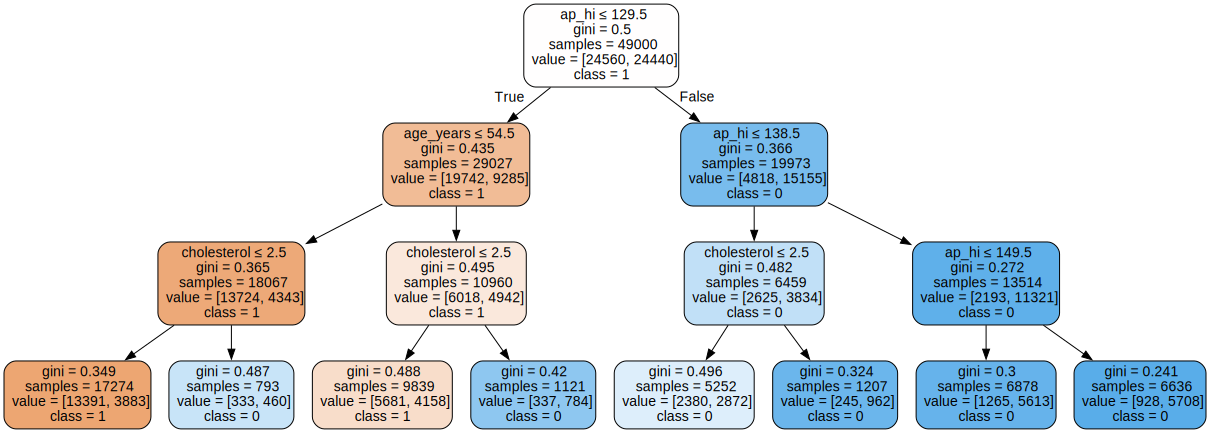

In [43]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=[str(i) for i in x_train.columns.to_list()],  
                     class_names=[str(i) for i in list(y_train.unique())],  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

What is the accuracy of prediction on test data?

In [44]:
accuracy_score(y_test, clf.predict(x_test))

0.7301904761904762

Now set cross validation parameters: method = "cv", number = 5. Tree parameters set to default.

In [45]:
clf = DecisionTreeClassifier()
cv_results = cross_validate(clf, x_train, y_train, cv=3, scoring='accuracy', return_train_score=True)

print('accuracy scores on train folds:', list(cv_results['train_score']))
print('avg accuracy on train folds:', np.mean(cv_results['train_score']))
print('-'*90)
print('accuracy scores on test folds:', list(cv_results['test_score']))
print('avg accuracy on test folds:', np.mean(cv_results['test_score']))

accuracy scores on train folds: [0.9856731770036123, 0.9859185110356017, 0.9860715706982581]
avg accuracy on train folds: 0.9858877529124909
------------------------------------------------------------------------------------------
accuracy scores on test folds: [0.6338924941839109, 0.6369313659462438, 0.6298291801873508]
avg accuracy on test folds: 0.6335510134391685


Plot final tree with rattle library

I can't do that ;)

The thing is that if you use the default parameters for sklearn DecisionTreeClassifier, it will set max_depth to None.
Which means that the nodes of our tree are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

I'm sure you can imagine that because of such behavior, final depth will be something like 50.
Plotting that graph would be very computationally expensive, and it'll be completely unreadable and useless.



What is the accuracy of prediction on test data?

In [46]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.6325714285714286

Does the accuracy became better or not?

The test accuracy became much worse, because of massive overfitting, as we can clearly see on cross-validation step.

DecisionTreeClassifier overfitted because max_depth was set to None (default behavior)